In [1]:
import numpy as np
import matplotlib.pyplot as plt
import galois
from classical_code import *
from quantum_code import *

In [2]:
H = np.array([
    [1,1,0,1,1,0,0],
    [1,0,1,1,0,1,0],
    [0,1,1,1,0,0,1],
    [1,0,1,0,1,0,1]
])

GF = galois.GF(2)
m,n = H.shape

In [51]:
GF = galois.GF(2)
ccode = read_code("../codes/ccodes/32_24_3_4.code")
H = np.zeros((ccode.m, ccode.n), dtype=int)
for i in range(ccode.m):
    for j in range(ccode.n):
        if (j in ccode.check_nbhd[i]):
            H[i][j] = 1
H = GF(H)
m, n = H.shape
print(H)

[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 

In [52]:
def gaussian_reduction(H):
    m, n = H.shape

    H = GF(H)
    Hhat = GF(H.copy())
    K = GF(np.eye(n, dtype=int))
    pik = set(np.arange(n))

    for j in range(n):
        i = 0
        while ((i < m-1) and (Hhat[i][j] != 1)):
            i += 1
        if Hhat[i][j] == 1:
            pik ^= {j}
            for l in range(j+1, n):
                if Hhat[i][l] == 1:
                    Hhat[:,l] = Hhat[:,j] ^ Hhat[:,l]
                    K[:,l] = K[:,j] ^ K[:,l]

    return K, pik

In [53]:
K, pik = gaussian_reduction(H)
I = np.eye(n, dtype=int)
pik

{22, 25, 26, 27, 28, 29, 30, 31}

In [54]:
Lx = []
Lz = []

for i in pik:
    for j in pik:
        tmp = np.kron(K[:,i], I[:,j])
        # tmp = tmp.reshape(n,n)
        Lz.append(tmp)

        tmp = np.kron(I[:,i], K[:,j])
        # tmp = tmp.reshape(n,n)
        Lx.append(tmp)

Lx = np.array(Lx)
Lz = np.array(Lz)

In [70]:
K, pik = gaussian_reduction(H.T)
I = np.eye(H.T.shape[1], dtype=int)
pik

{3}

In [55]:
H = np.array(H)
Hx = np.hstack([np.kron(H, np.eye(H.shape[1], dtype=int)), np.kron(np.eye(H.shape[0], dtype=int), H.T)])
Hz = np.hstack([np.kron(np.eye(H.shape[1], dtype=int), H), np.kron(H.T, np.eye(H.shape[0], dtype=int))])
cm, cn = Hx.shape

Hx_inds = [np.where(Hx[i])[0] for i in range(Hx.shape[0])]
Hz_inds = [np.where(Hz[i])[0] for i in range(Hz.shape[0])]

xL_inds = [np.where(x)[0] for x in Lx]
zL_inds = [np.where(z)[0] for z in Lz]
k = len(xL_inds)

# qcode = QuantumCode(cn, k, Hz.shape[0], Hz.shape[0],
#                     0, 0,
#                     Hx_inds, Hz_inds, xL_inds, zL_inds)
# write_qcode("../codes/qcodes/" + f"/HGP_{cn}_{k}.qcode", qcode)


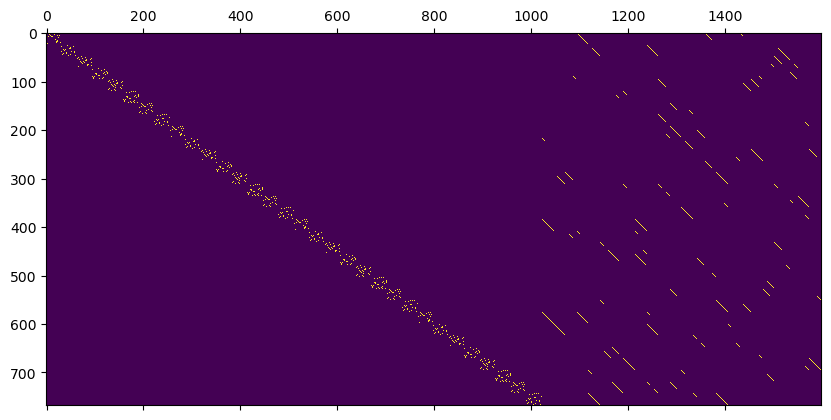

In [56]:
plt.matshow(np.array(Hz))

In [57]:
xgens = []
zgens = []

for i in range(Hx.shape[0]):
    xgens.append((Hx[i][:n**2].reshape(n,n), Hx[i][n**2:].reshape(m,m)))
    zgens.append((Hz[i][:n**2].reshape(n,n), Hz[i][n**2:].reshape(m,m)))

In [58]:
H

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0,

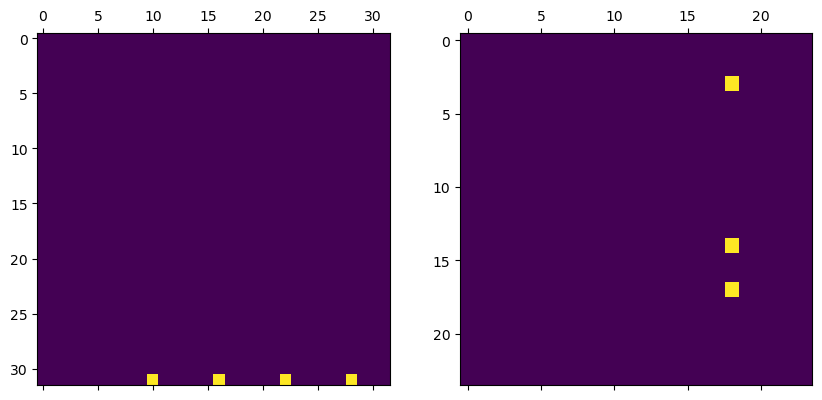

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

axes[0].matshow(zgens[-1][0])
axes[1].matshow(zgens[18][1])

In [60]:
Lx[0].reshape(n,n)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [61]:
inds = np.arange(Hx.shape[1])
left, right = (inds[:n**2].reshape(n,n), inds[n**2:].reshape(m,m))
print(left)
print(right)

[[   0    1    2 ...   29   30   31]
 [  32   33   34 ...   61   62   63]
 [  64   65   66 ...   93   94   95]
 ...
 [ 928  929  930 ...  957  958  959]
 [ 960  961  962 ...  989  990  991]
 [ 992  993  994 ... 1021 1022 1023]]
[[1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037
  1038 1039 1040 1041 1042 1043 1044 1045 1046 1047]
 [1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061
  1062 1063 1064 1065 1066 1067 1068 1069 1070 1071]
 [1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085
  1086 1087 1088 1089 1090 1091 1092 1093 1094 1095]
 [1096 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109
  1110 1111 1112 1113 1114 1115 1116 1117 1118 1119]
 [1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133
  1134 1135 1136 1137 1138 1139 1140 1141 1142 1143]
 [1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157
  1158 1159 1160 1161 1162 1163 1164 1165 1166 1167]
 [1168 1169 1170 1171 

In [62]:
def assign_qubits(left, right):
    pairs = np.concatenate([np.diagonal(left), np.diagonal(right)]).reshape(-1, 2)

    upper_triangle_inds = np.triu_indices(left.shape[0], k=1)
    for i, j in zip(*upper_triangle_inds):
        tmp = np.array([left[i][j], left[j][i]])
        pairs = np.vstack([pairs, tmp])

    upper_triangle_inds = np.triu_indices(right.shape[0], k=1)
    for i, j in zip(*upper_triangle_inds):
        tmp = np.array([right[i][j], right[j][i]])
        pairs = np.vstack([pairs, tmp])

    return pairs

pairs = assign_qubits(left, right)
pairs

array([[   0,   33],
       [  66,   99],
       [ 132,  165],
       ...,
       [1550, 1573],
       [1551, 1597],
       [1575, 1598]])

In [63]:
def iceberglogicals(n):
    icebergX = np.zeros(shape=(n-2,2), dtype=int)
    icebergZ = np.zeros(shape=(n-2,2), dtype=int)

    for i in range(n-2):
        icebergX[i] = np.array([0,i+1])
        icebergZ[i] = np.array([i+1,n-1])

    return icebergX, icebergZ

iceberg642Xlogicals = np.array([
    [1,2],
    [0,1],
    [4,5],
    [3,4],
])

iceberg642Zlogicals = np.array([
    [0,1],
    [1,2],
    [3,4],
    [4,5]
])

ibn = 4
ibk = ibn-2
icebergX = np.ones(ibn, dtype=int)
# icebergZ = np.ones(ibn, dtype=int)

# if (ibn == 6):
#     icebergXlogicals, icebergZlogicals = iceberg642Xlogicals, iceberg642Zlogicals
# else:
icebergXlogicals, icebergZlogicals = iceberglogicals(ibn)
print(icebergXlogicals)
print(icebergZlogicals)

[[0 1]
 [0 2]]
[[1 3]
 [2 3]]


In [64]:
# Hx, Hz, Lx, Lz = qcode.to_numpy()
concatenatedStabilizersQED = np.kron(np.eye(Hx.shape[1]//ibk, dtype=int), icebergX) # ibk | Hx.shape[1] required

concatenatedStabilizersXQEC = np.zeros(shape=(Hx.shape[0], concatenatedStabilizersQED.shape[1]), dtype=int)
concatenatedStabilizersZQEC = np.zeros(shape=(Hz.shape[0], concatenatedStabilizersQED.shape[1]), dtype=int)

for i, r in enumerate(Hx):
    # print(np.where(r))
    for x in np.where(r)[0]:
        iceberg_block = np.where(pairs == x)[0][0]
        iceberg_log = np.where(pairs == x)[1][0]
        # print(iceberg_block, iceberg_log)
        concatenatedStabilizersXQEC[i][icebergXlogicals[iceberg_log]+(ibn*iceberg_block)] ^= 1

for i, r in enumerate(Hz):
    for z in np.where(r)[0]:
        iceberg_block = np.where(pairs == z)[0][0]
        iceberg_log = np.where(pairs == z)[1][0]
        concatenatedStabilizersZQEC[i][icebergZlogicals[iceberg_log]+(ibn*iceberg_block)] ^= 1

concatenatedHx = np.vstack([concatenatedStabilizersXQEC, concatenatedStabilizersQED][::-1])
concatenatedHz = np.vstack([concatenatedStabilizersZQEC, concatenatedStabilizersQED][::-1])

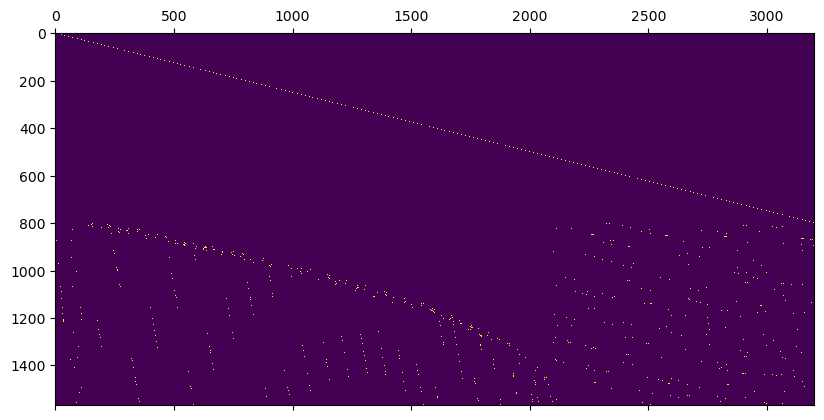

In [65]:
plt.matshow(concatenatedHz)

In [66]:
concatenatedxL = np.zeros(shape=(Lx.shape[0], concatenatedStabilizersQED.shape[1]), dtype=int)
concatenatedzL = np.zeros(shape=(Lz.shape[0], concatenatedStabilizersQED.shape[1]), dtype=int)

for i, r in enumerate(Lx):
    for x in np.where(r)[0]:
        iceberg_block = np.where(pairs == x)[0][0]
        iceberg_log = np.where(pairs == x)[1][0]
        # print(iceberg_block, iceberg_log)
        concatenatedxL[i][icebergXlogicals[iceberg_log]+(ibn*iceberg_block)] ^= 1

for i, r in enumerate(Lz):
    for z in np.where(r)[0]:
        iceberg_block = np.where(pairs == z)[0][0]
        iceberg_log = np.where(pairs == z)[1][0]
        concatenatedzL[i][icebergZlogicals[iceberg_log]+(ibn*iceberg_block)] ^= 1

xL_inds = [np.where(x)[0] for x in concatenatedxL]
zL_inds = [np.where(z)[0] for z in concatenatedzL]

m, n = concatenatedHx.shape
k = len(xL_inds)

Hx_inds = [np.where(concatenatedHx[i])[0] for i in range(concatenatedHx.shape[0])]
Hz_inds = [np.where(concatenatedHz[i])[0] for i in range(concatenatedHz.shape[0])]

qcode = QuantumCode(n, k, concatenatedHx.shape[0], concatenatedHz.shape[0],
                    concatenatedStabilizersQED.shape[0], concatenatedStabilizersQED.shape[0],
                    Hx_inds, Hz_inds, xL_inds, zL_inds, list(pairs))
write_qcode("../codes/qcodes/" + f"/HGP_C{ibn}{ibk}2_{n}_{k}.qcode", qcode)

In [274]:
zL_inds

[array([13, 15, 49, 51, 73, 75, 93, 95], dtype=int64),
 array([ 53,  55,  77,  79,  97,  99, 137, 139], dtype=int64),
 array([109, 111, 121, 123, 129, 131, 138, 139], dtype=int64),
 array([ 14,  15, 113, 115, 125, 127, 133, 135], dtype=int64)]

In [275]:
xL_inds

[array([12, 13, 48, 50, 72, 74, 92, 94], dtype=int64),
 array([108, 110, 120, 122, 128, 130, 136, 137], dtype=int64),
 array([ 52,  54,  76,  78,  96,  98, 136, 138], dtype=int64),
 array([ 12,  14, 112, 114, 124, 126, 132, 134], dtype=int64)]